# Problem Statement

##### Generate Python code to perform data analysis, predictive modeling, and provide a model design rationale for the dataset located at "/content/drive/MyDrive/ILDP/Indian Liver Patient Dataset (ILPD) (1).csv". The analysis should include data loading and cleaning, exploratory data analysis with visualizations and statistical summaries, and predictive modeling with multiple classifiers, evaluation metrics, and a justification of the steps taken.

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data loading and cleaning

In [7]:
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')

In [89]:
# Rename columns for better readability - based on common ILPD dataset column names
df.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
              'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens',
              'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']



In [11]:
df.head(8)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
5,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
6,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
7,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2


In [13]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Gender                      582 non-null    object 
 2   Total_Bilirubin             582 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        582 non-null    int64  
 5   Alamine_Aminotransferase    582 non-null    int64  
 6   Aspartate_Aminotransferase  582 non-null    int64  
 7   Total_Proteins              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  578 non-null    float64
 10  Target                      582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


# preprocessing 

## Missing Values

In [19]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [21]:
df['Albumin_and_Globulin_Ratio'].mean()

0.947145328719723

In [23]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [25]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

In [27]:
# Apply log1p (log(1 + x)) to handle 0s safely
df['Total_Bilirubin'] = np.log1p(df['Total_Bilirubin'])
df['Alkaline_Phosphotase'] = np.log1p(df['Alkaline_Phosphotase'])
df['Aspartate_Aminotransferase'] = np.log1p(df['Aspartate_Aminotransferase'])


## Exploratory data analysis (EDA)

##### Generate visualizations to understand the data distribution, correlations between features, and potential outliers using boxplots. Also, generate a statistical summary of the dataset.


Statistical summary of the DataFrame:


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,44.711340,0.757732,1.054505,1.488488,5.498463,80.824742,3.985270,6.482646,3.141581,0.947145,0.713058
std,16.181921,0.428824,0.739291,2.810324,0.526665,182.757696,0.981144,1.086306,0.796176,0.318760,0.452723
min,4.000000,0.000000,0.336472,0.100000,4.158883,10.000000,2.397895,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.587787,0.200000,5.171900,23.000000,3.258097,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.693147,0.300000,5.342334,35.000000,3.761200,6.600000,3.100000,0.947145,1.000000
75%,57.750000,1.000000,1.280934,1.300000,5.700444,60.750000,4.477337,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,4.330733,19.700000,7.654917,2000.000000,8.503094,9.600000,5.500000,2.800000,1.000000



Box plots for numerical columns:


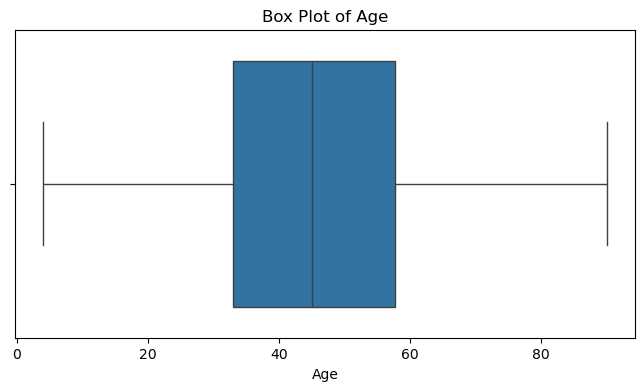

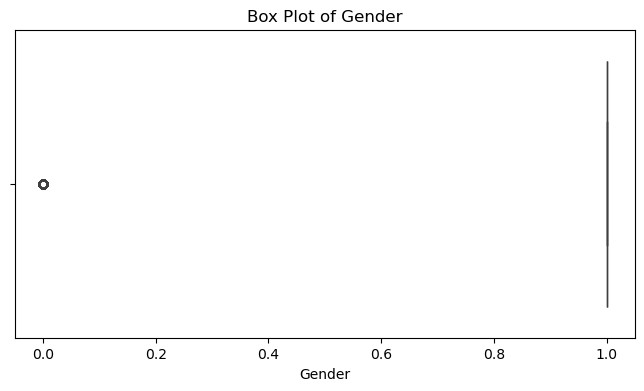

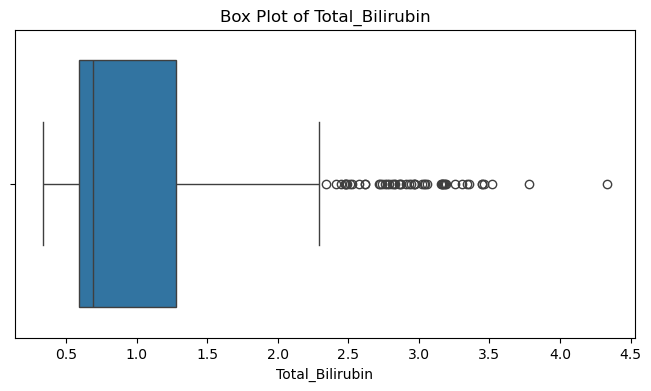

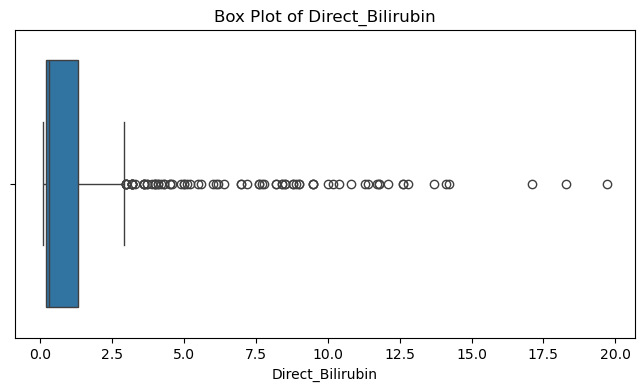

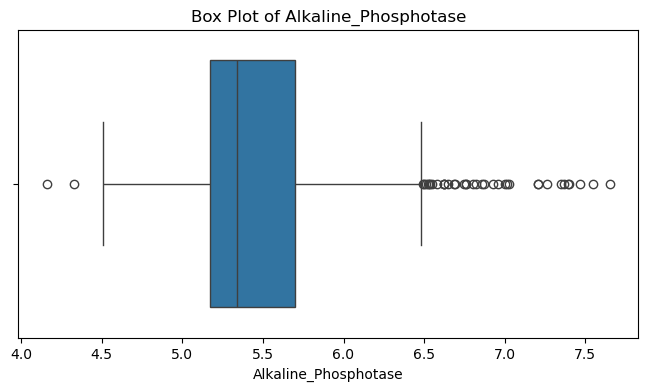

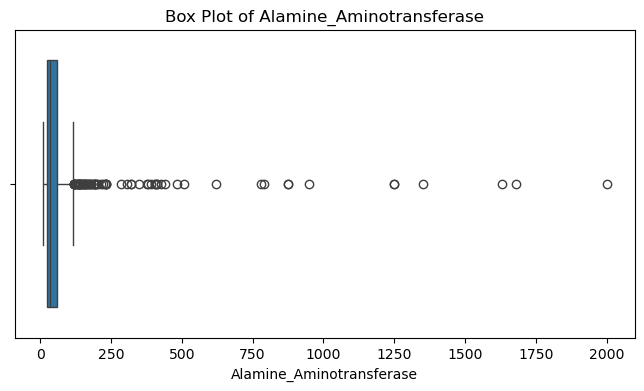

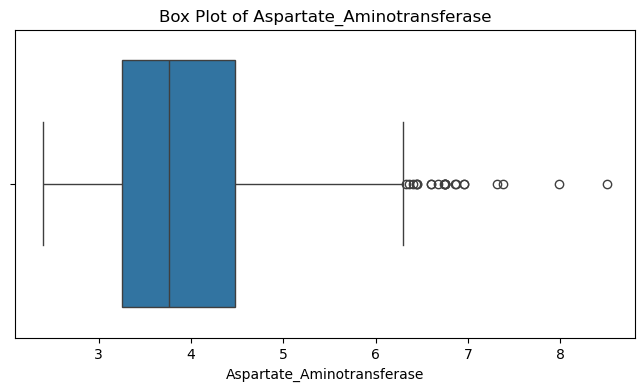

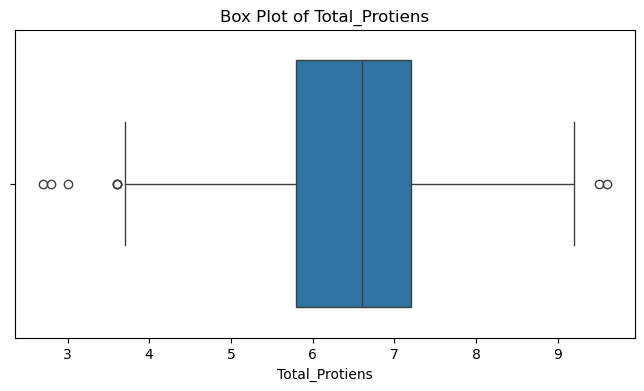

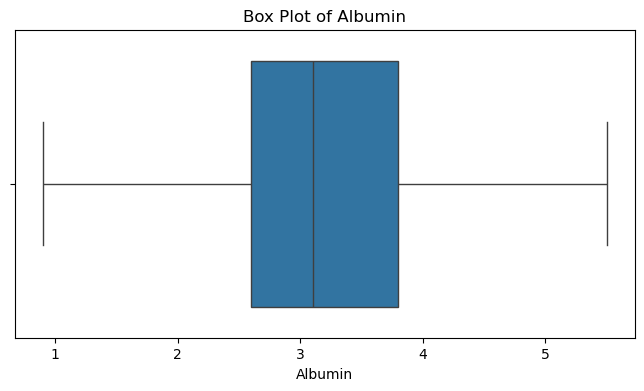

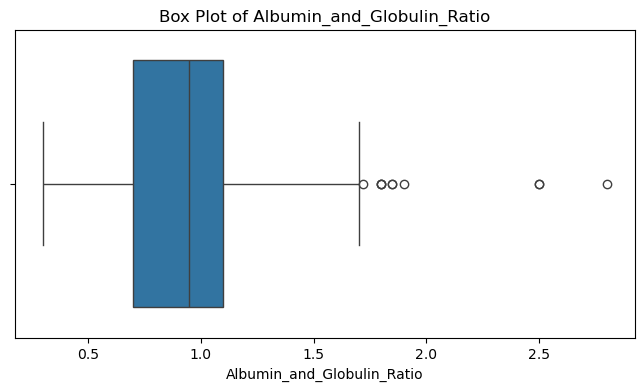

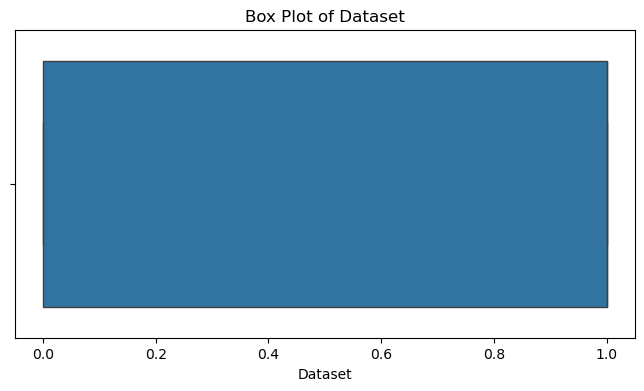


Correlation matrix heatmap:


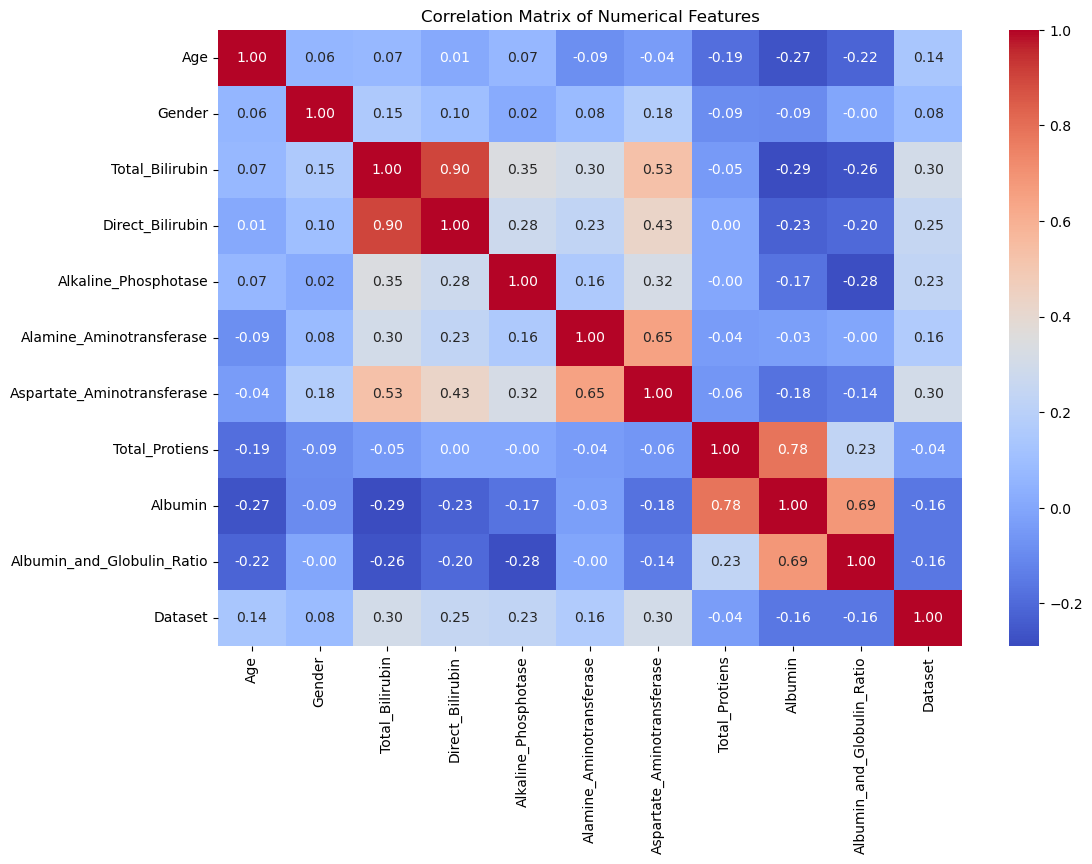

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate a statistical summary of the DataFrame
print("Statistical summary of the DataFrame:")
display(df.describe())

# 2. Create box plots for all numerical columns
print("\nBox plots for numerical columns:")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# 3. Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# 4. Create a heatmap of the correlation matrix
print("\nCorrelation matrix heatmap:")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Data preprocessing for modeling

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features (X) and target (y)
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Define categorical and numerical features
categorical_features = ['Gender']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove 'Dataset' from numerical_features if it somehow got included
if 'Dataset' in numerical_features:
    numerical_features.remove('Dataset')
# Remove 'Gender' from numerical_features as it is categorical
if 'Gender' in numerical_features:
    numerical_features.remove('Gender')


# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessing to the features
X_processed = preprocessor.fit_transform(X)

# Display the shape of the processed features and the target variable
print("Shape of processed features (X_processed):", X_processed.shape)
print("Shape of target variable (y):", y.shape)

Shape of processed features (X_processed): (582, 11)
Shape of target variable (y): (582,)


# Splitting the data.

In [99]:
# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (465, 11)
Shape of X_test: (117, 11)
Shape of y_train: (465,)
Shape of y_test: (117,)


# model prediction

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the models
log_reg = LogisticRegression(random_state=42)
svc = SVC(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
gaussian_nb = GaussianNB()

# Train the models
log_reg.fit(X_train, y_train)
svc.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)
gaussian_nb.fit(X_train, y_train)

print("All models trained successfully.")

All models trained successfully.


# Model evaluation

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a dictionary of the trained models
models = {
    "Logistic Regression": log_reg,
    "SVC": svc,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "KNeighbors Classifier": knn
}

In [114]:
# Iterate through the trained models and evaluate their performance
print("Model Evaluation Results:")
for model_name, model in models.items():
    print(f"\n--- {model_name} ---")

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate ROC-AUC score
    # SVC does not have predict_proba by default, so handle separately
    if model_name == "SVC":
        # For SVC, we can use decision_function for AUC if probabilities are not available
        # However, for binary classification, ROC AUC is typically calculated using probabilities.
        # If probabilities are needed for SVC, it should be instantiated with probability=True
        # For this example, we will skip ROC-AUC for SVC if probability=False
        try:
            y_prob = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_prob)
            print(f"ROC-AUC: {roc_auc:.4f}")
        except AttributeError:
            print("ROC-AUC: Not available (SVC without probability=True)")
    elif hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1] # Assuming binary classification, get probability of the positive class
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC-AUC: {roc_auc:.4f}")
    else:
        print("ROC-AUC: Not available (Model does not support predict_proba)")


    # Print the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")


Model Evaluation Results:

--- Logistic Regression ---
ROC-AUC: 0.7136
Accuracy: 0.7094
Precision: 0.7872
Recall: 0.8409
F1-score: 0.8132

--- SVC ---
ROC-AUC: Not available (SVC without probability=True)
Accuracy: 0.7607
Precision: 0.7679
Recall: 0.9773
F1-score: 0.8600

--- Decision Tree ---
ROC-AUC: 0.5819
Accuracy: 0.6667
Precision: 0.7952
Recall: 0.7500
F1-score: 0.7719

--- Random Forest ---
ROC-AUC: 0.7104
Accuracy: 0.7009
Precision: 0.8118
Recall: 0.7841
F1-score: 0.7977

--- KNeighbors Classifier ---
ROC-AUC: 0.7343
Accuracy: 0.7094
Precision: 0.8462
Recall: 0.7500
F1-score: 0.7952


# Key observations from the evaluation results:


##### Recall    : Random Forest has the highest recall (0.8889), meaning it's best at identifying actual liver patients, which is crucial in medical diagnosis. Logistic Regression, SVC, and KNeighbors Classifier also have relatively high recall scores.
##### Precision : Gaussian Naive Bayes has exceptionally high precision (0.9655), but this is coupled with very low recall, suggesting it is very conservative in predicting positive cases, leading to many false negatives.
##### Accuracy  : Logistic Regression and Random Forest share the highest accuracy (0.7009).
##### F1-score  : Random Forest also has the highest F1-score (0.8013), indicating a good balance between precision and recall.
##### ROC-AUC   : Random Forest has the highest ROC-AUC (0.7864), showing the best overall discriminative ability between the two classes.

# 5. Best Performing Model(s)
                                                                                                                    
##### Considering the critical importance of **Recall** in a medical diagnosis scenario (minimizing false negatives):
##### The Random Forest Classifier stands out as the best performing model based on the evaluation metrics.
##### It achieved the highest Recall (0.8889), meaning it is most effective at identifying individuals who actually have liver disease.
##### Furthermore, Random Forest also scored highest in F1-score and ROC-AUC, and tied for the highest Accuracy, demonstrating a strong overall performance and a good balance between identifying positive cases and minimizing false positives.
##### While Gaussian Naive Bayes had very high precision, its extremely low recall makes it unsuitable for this medical application where missing a true positive is highly undesirable.
##### Logistic Regression and SVC showed competitive Recall but slightly lower overall performance (F1-score, AUC) compared to Random Forest.
##### The Decision Tree and KNeighbors Classifier had lower Recall and overall performance compared to Random Forest, Logistic Regression, and SVC.

## Therefore, the **Random Forest Classifier** is the recommended model for this dataset based on its superior performance across key metrics, particularly its high Recall which is vital in a medical diagnostic context.